# Housing Prices dataset analysis 

## Defining the question

### Specifying the question

What are the factors affecting the rates of housing prices?

### Defining the metric of success

The project will be considered a success when the factors affecting housing prices and the magnitude of their effects are determined and a model built to predict pricing upon being provided with the predictor variables.

### Understanding the context

The dataset contains information about real estate properties collected over the course of the past few months. The data was recorded in the year 2015.

## Reading the data

Importing the relevant libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


Setting our visualization parameters

In [2]:
sns.set_theme(style='whitegrid')
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['axes.labelweight'] = 600
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['axes.titleweight'] = 600


Loading our real estate dataset

In [3]:
Real_estate =pd.read_csv("/content/Independent Project Week 7 - house_data.csv")


## Checking the data

In [4]:
# checking the number of records in the dataset

print('Our dataset has',Real_estate.shape[0], 'rows and', Real_estate.shape[1],'columns.')

Our dataset has 21613 rows and 20 columns.


In [5]:
# previewing the head of the dataset

Real_estate.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
# previewing the tail of the dataset

Real_estate.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [7]:
# displaying the data types for the columns in the dataset

Real_estate.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## Tidying the dataset

In [8]:
# checking for null values in our dataset

Real_estate.isnull().any()

id               False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

Our data does not have any null values.

In [9]:
# checking for duplicates in our dataset

Real_estate.duplicated().any()

True

There are duplicates in our dataset. They need to be dealt with.

In [10]:
# dealing with duplicates 
Real_estate.drop_duplicates(inplace=True)
Real_estate.duplicated().any()

False

The column id will not be of any use to us during analysis, thus it needs to be dropped.
The columns latitude and longitude will also be dropped as the factor of location can be evaluated using the zipcode variable
As the sqft_living15 and sqft_lot15 capture the latest and most acccurate areas for the living area and lot areas respectively, the sqft_living and sqft_lot columns are to be dropped.

In [11]:
# dropping of unnecessary columns.

Real_estate.drop(['id', 'lat', 'long', 'sqft_living', 'sqft_lot'], axis=1, inplace=True)

In [12]:
# checking for anomalies
# the waterfront variable is the only categorical variable in our dataset with the binary possibilities; Yes and No i.e 1 and 0 respectively.

Real_estate['waterfront'].unique()

array([0, 1])

There are no anomalies in our waterfront column.

I have decided to use the columns year renovated and year built to create two new columns, years since renovation and age of the house. I feel like this will result in a more accurate analysis.
The records with houses that haven't been renovated will have their values for years since renovation equal to the age of the house.

In [13]:
# creating the two new columns

Real_estate['house_age'] = (2015 - Real_estate['yr_built'])
Real_estate['yrs_since_reno'] = (Real_estate['yr_renovated']- Real_estate['yr_built'])

In [14]:
# identifying the records with houses that haven't had renovations as those with years since renovation as below zero
# then replacing that value with their values for the ages of the houses.

not_reno = Real_estate[Real_estate['yrs_since_reno'] < 0] 
not_reno['yrs_since_reno'] = not_reno['house_age']
not_reno

reno = Real_estate[Real_estate['yrs_since_reno'] >= 0]
reno

# concatenating the two dataframes
Real_estate = pd.concat([reno, not_reno], axis=0)
Real_estate.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


(21610, 17)

In [15]:
# dropping the columns yr_renovated and year built

Real_estate.drop(['yr_renovated','yr_built'], axis=1, inplace=True)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


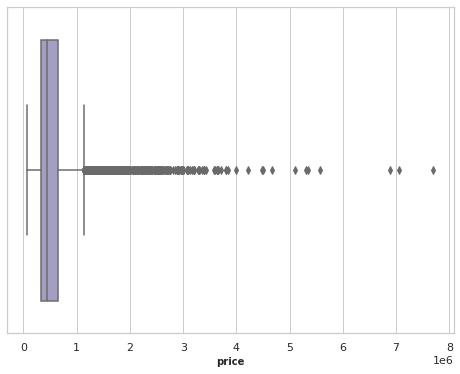

In [16]:
# checking for outliers in the pricing variable

sns.boxplot(Real_estate['price'], palette='Purples')

There seem to be quite a number of outliers in our pricing dataset.
The average pricing seems to be around sh 500,000.

## Exploratory Data Analysis

### Univariate Analysis

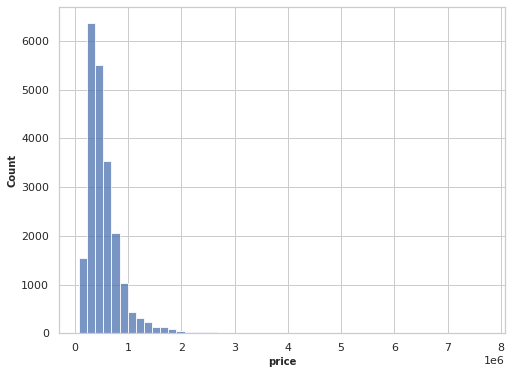

In [24]:
# plotting the distribution of pricing

sns.histplot(data=Real_estate['price'], palette='Purples', bins=50)

Our data is skewed to the right.

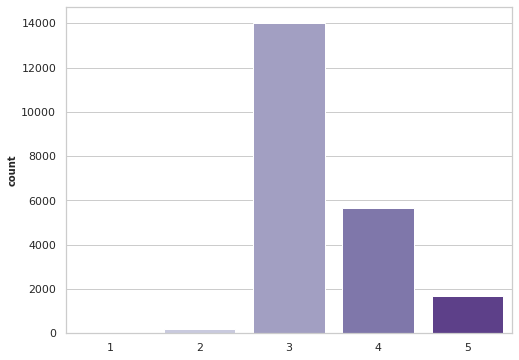

In [25]:
# plotting the number of houses assigned the different discrete values for condition.

# creating a dataframe with the computed number of houses assigned the same value.
con =pd.DataFrame(Real_estate['condition'].value_counts())

# renaming the column name condition to count
con.columns = con.columns.str.replace('condition','count')

# plotting the bar graph
sns.barplot(x = con.index, y= con['count'], palette='Purples')

Most of the houses have been assigned the middle value for condition 3.0.
Houses having been assigned the low scores for condtion appear to be very few.

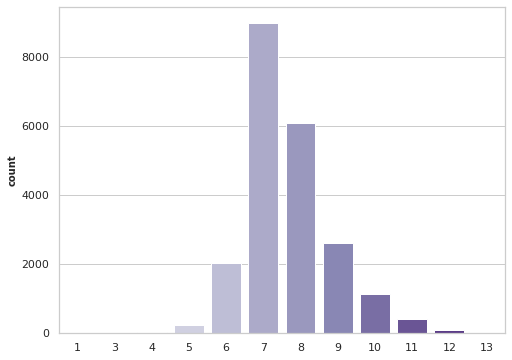

In [26]:
# plotting the number of houses assigned the different discrete values for condition.

# creating a dataframe with the computed number of houses assigned the same value.
grad =pd.DataFrame(Real_estate['grade'].value_counts())

# renaming the grade column count 
grad.columns = grad.columns.str.replace('grade','count')

# plotting the bar graph
sns.barplot(x = grad.index, y= grad['count'], palette='Purples')

A majority of the houses have a grade 7 which is an average grade value.
Most houses have a score larger than 5.0.

### Bivariate Analysis

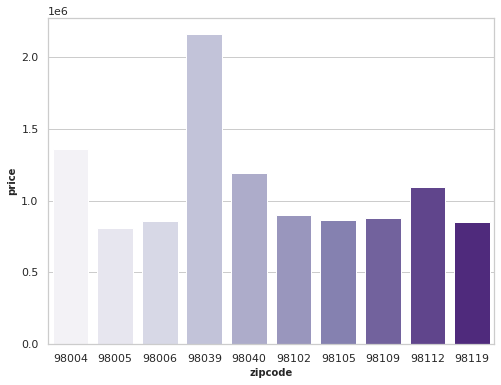

In [27]:
# plotting the area codes with the highest mean in housing prices

location = pd.DataFrame(Real_estate.groupby(by=['zipcode'])['price'].mean())
top_ten =location.sort_values(by=['price'], ascending=False).head(10)


sns.barplot(x=top_ten.index, y=top_ten['price'], palette='Purples')


The zipcode 98039 has its mean house pricing significantly higher than all other zipcodes.
Zipcodes 98004 and 98040 have the second and third highest mean house pricing respectively.

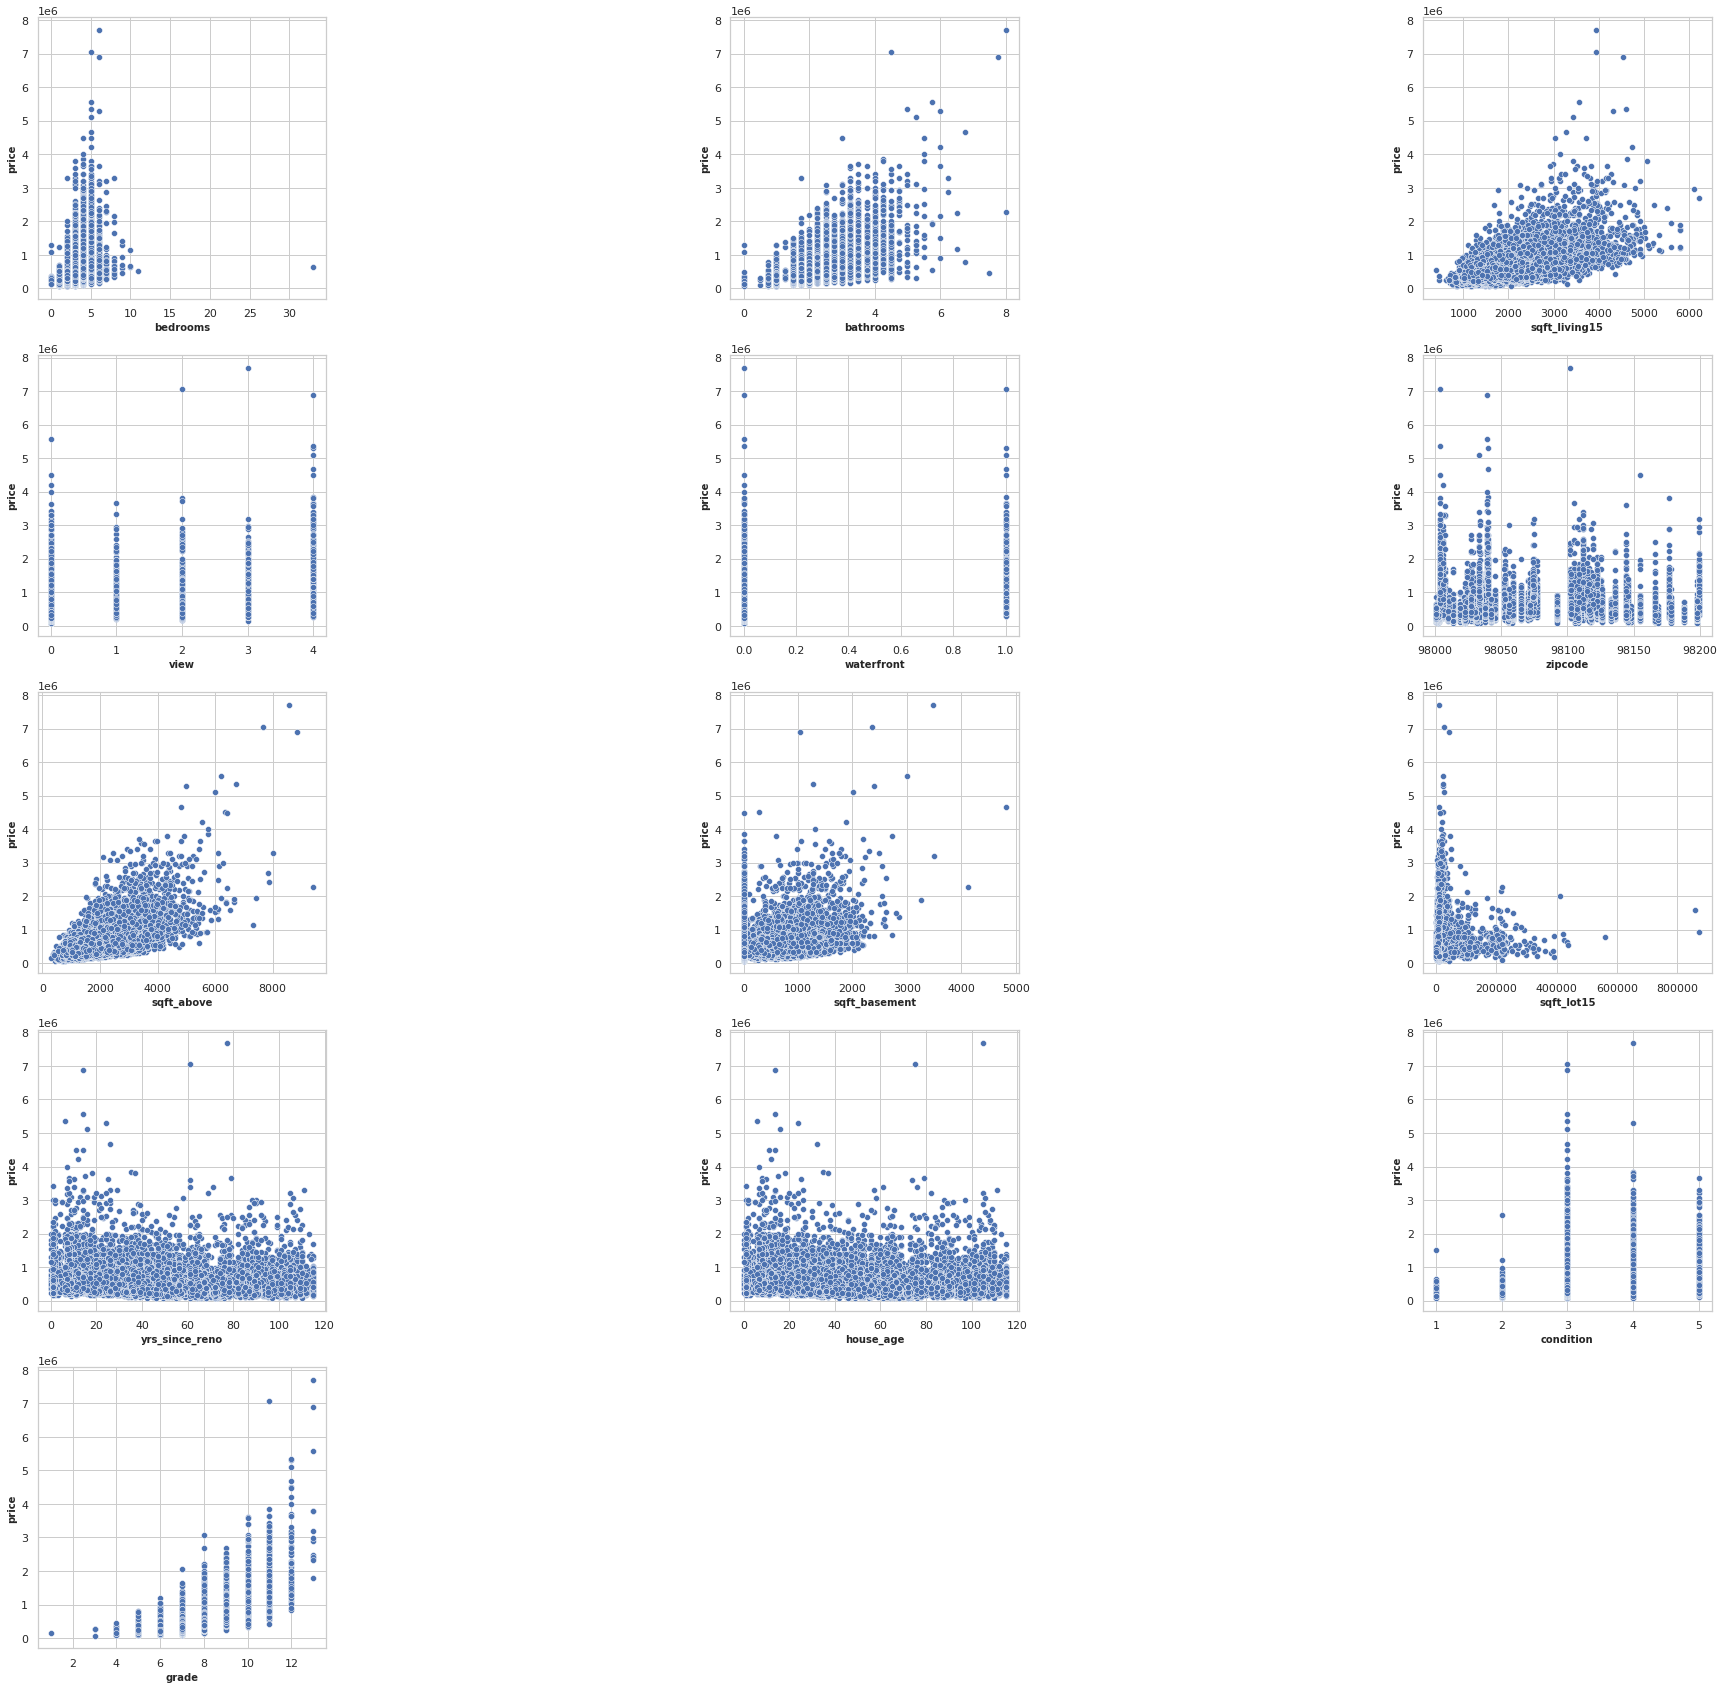

In [28]:
# defining a function for plotting scatter plots for all the variables against price.

def plot_scatter(col):

  sns.scatterplot(x= Real_estate[col], y= Real_estate['price'], palette='Purples')
  
plt.figure(figsize=(30,30))
plt.subplot(5,5,1)
plot_scatter('bedrooms')
plt.subplot(5,5,3)
plot_scatter('bathrooms')
plt.subplot(5,5,5)
plot_scatter('sqft_living15')
plt.subplot(5,5,6)
plot_scatter('view')
plt.subplot(5,5,8)
plot_scatter('waterfront')
plt.subplot(5,5,10)
plot_scatter('zipcode')
plt.subplot(5,5,11)
plot_scatter('sqft_above')
plt.subplot(5,5,13)
plot_scatter('sqft_basement')
plt.subplot(5,5,15)
plot_scatter('sqft_lot15')
plt.subplot(5,5,16)
plot_scatter('yrs_since_reno')
plt.subplot(5,5,18)
plot_scatter('house_age')
plt.subplot(5,5,20)
plot_scatter('condition')
plt.subplot(5,5,21)
plot_scatter('grade')

Bathrooms, sqft_living15, sqft_basement and sqft_above appear to have a linear correlation to the prices column.

Grade and sqft_lot15 exhibit a correlation to price, albeit not a linear one.

### Multivariate analysis

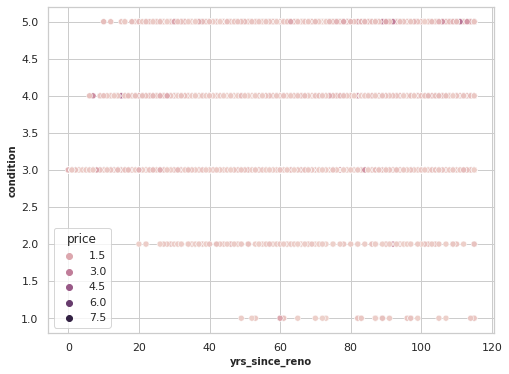

In [29]:
sns.scatterplot(x=Real_estate['yrs_since_reno'], y=Real_estate['condition'], hue=Real_estate['price'])

The data points spread across the condition of 0.1 appear to have two price values.

The data points with darker hues i.e higher price values, appear to be spread across condition values 3.0 - 5.0.
This is confirmation that houses assigned value 5.0 for condition are in the best conditions.

## Implementing the solution

#### Linear regression

For an accurate linear model, the predictor variables need to be independant, i.e they should not exhibit high correlaions to each other. By calculating the VIF scores we might get an idea of the variables that might hinder the buliding of an accurate model.


In [31]:
# checking out the vif scores for the different variables
core = Real_estate.drop(['price'], axis=1)
core_cor = core.corr()
pd.DataFrame(np.linalg.inv(core_cor.values), index =core_cor.index, columns=core_cor.columns)

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,house_age,yrs_since_reno
bedrooms,1.648749,-0.455728,0.051668,0.060760,0.109638,-0.057546,0.320005,-0.875207,-0.481202,0.083113,0.028336,0.119988,0.142582,-0.258961
bathrooms,-0.455728,3.308477,-0.689828,0.005756,-0.045189,-0.102291,-0.303795,-1.256683,-1.089261,0.020358,0.116154,0.062039,0.025577,0.803226
floors,0.051668,-0.689828,1.984235,-0.006057,-0.032257,0.101501,-0.301809,-0.447875,0.594252,-0.265171,0.292079,0.133402,-0.039663,0.433998
waterfront,0.060760,0.005756,-0.006057,1.205524,-0.493660,-0.009874,0.041847,-0.102271,-0.005952,0.013142,0.061441,0.004142,-0.467058,0.473523
view,0.109638,-0.045189,-0.032257,-0.493660,1.418012,-0.023153,-0.171557,0.030735,-0.256050,-0.139442,-0.293465,-0.045402,-0.379950,0.227125
condition,-0.057546,-0.102291,0.101501,-0.009874,-0.023153,1.219260,-0.025137,0.046362,-0.090423,0.170721,0.065830,-0.009329,0.120321,-0.597023
grade,0.320005,-0.303795,-0.301809,0.041847,-0.171557,-0.025137,3.249241,-1.496620,-0.537633,-0.140990,-0.859653,0.103622,0.575542,-0.147475
sqft_above,-0.875207,-1.256683,-0.447875,-0.102271,0.030735,0.046362,-1.496620,4.813755,1.371045,0.103800,-1.570923,-0.371551,-0.683230,0.296090
sqft_basement,-0.481202,-1.089261,0.594252,-0.005952,-0.256050,-0.090423,-0.537633,1.371045,1.993244,-0.155528,-0.446669,-0.065441,-0.249187,-0.060609
zipcode,0.083113,0.020358,-0.265171,0.013142,-0.139442,0.170721,-0.140990,0.103800,-0.155528,1.303031,0.318801,0.099043,-0.194410,-0.310534


The house age and yrs_since_reno exhibit very high VIF scores.

In [32]:
# Dropping house_age column and recalculating VIF scores.

core.drop(['house_age'], axis=1, inplace= True)
core_cor = core.corr()
pd.DataFrame(np.linalg.inv(core_cor.values), index =core_cor.index, columns=core_cor.columns)

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,yrs_since_reno
bedrooms,1.648172,-0.455832,0.051829,0.062651,0.111176,-0.058033,0.317675,-0.872441,-0.480194,0.083900,0.027406,0.120145,-0.118971
bathrooms,-0.455832,3.308459,-0.689799,0.006095,-0.044913,-0.102378,-0.304213,-1.256187,-1.089080,0.020499,0.115987,0.062068,0.828337
floors,0.051829,-0.689799,1.984190,-0.006583,-0.032685,0.101636,-0.301161,-0.448644,0.593971,-0.265390,0.292338,0.133359,0.395056
waterfront,0.062651,0.006095,-0.006583,1.199331,-0.498698,-0.008278,0.049478,-0.111330,-0.009256,0.010565,0.064486,0.003626,0.014956
view,0.111176,-0.044913,-0.032685,-0.498698,1.413914,-0.021855,-0.165349,0.023365,-0.258738,-0.141539,-0.290988,-0.045822,-0.145917
condition,-0.058033,-0.102378,0.101636,-0.008278,-0.021855,1.218849,-0.027103,0.048695,-0.089572,0.171385,0.065046,-0.009196,-0.478889
grade,0.317675,-0.304213,-0.301161,0.049478,-0.165349,-0.027103,3.239837,-1.485456,-0.533561,-0.137813,-0.863406,0.104259,0.417604
sqft_above,-0.872441,-1.256187,-0.448644,-0.111330,0.023365,0.048695,-1.485456,4.800503,1.366212,0.100029,-1.566468,-0.372306,-0.374720
sqft_basement,-0.480194,-1.089080,0.593971,-0.009256,-0.258738,-0.089572,-0.533561,1.366212,1.991481,-0.156903,-0.445045,-0.065716,-0.305266
zipcode,0.083900,0.020499,-0.265390,0.010565,-0.141539,0.171385,-0.137813,0.100029,-0.156903,1.301958,0.320069,0.098828,-0.501409


The VIF scores for the variables have no values above 5.

In [33]:
dep_var = Real_estate['price'] # ------the price variable
linear_var = Real_estate.drop(['price', 'yrs_since_reno'], axis=1)

The heteroscedasticity of the variables has to be tested to confirm a constant variance within the variables values.

In [34]:
# computing my residuals
from sklearn import metrics

X = linear_var
y = dep_var

X_train, X_test, p_train, p_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, p_train)

# predicting the value
p_predict = regressor.predict(X_test)

# creating a variable residuals which is the difference between the predicted and actual values.
residuals = np.subtract(p_predict, p_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

-2632.632288450192

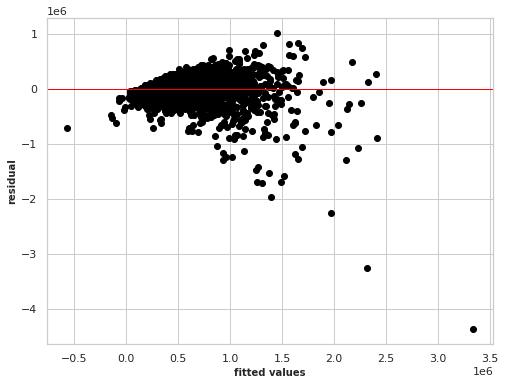

In [35]:
plt.scatter(p_predict, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

The residuals are clustered nicely around the mean. A few exceptions are observed.

In [38]:
# testing heteroscedasticity using Bartlett's test

import scipy as sp

test_result, p_value = sp.stats.bartlett(p_predict, residuals)

# specifying the degrees of freedom and the probability.
degree_of_freedom = len(p_predict)-1
probability = 1 - p_value

# computing the critical value
critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')


inf
the variances are homogeneous!


As the variances are homogenous the linear regression model can now be built.

In [39]:
# fitting the linear regression models to our train sets

lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_train, p_train)

# displaying the regression coefficients
lin_reg.coef_

array([-3.85713821e+04,  4.63124213e+04,  2.74954069e+04,  6.28928136e+05,
        4.22360993e+04,  2.07866765e+04,  1.19513420e+05,  1.54758302e+02,
        1.58885499e+02,  2.68307622e+00,  2.93695918e+01, -5.34891845e-01,
        3.58383694e+03])

The order of effects of the variables to the dependant variable is as follows:
  1. 

In [41]:
# calulating the mean squared error and the root mean squared error for the linear regression model. 
y_pred = lin_reg.predict(X_test)

 
print('Mean Squared Error:', metrics.mean_squared_error(p_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(p_test, y_pred)))

Mean Squared Error: 48014008361.46654
Root Mean Squared Error: 219120.99023477084


In [42]:
# creating a dataframe for the actual and predicted variables.
comparison_frame = pd.DataFrame({'Actual': p_test, 'Predicted_linear': y_pred})

comp_line =comparison_frame.describe()

In [43]:
comp_line

,Actual,Predicted_linear
count,4.322000e+03,4.322000e+03
mean,5.409381e+05,5.383055e+05
std,3.735403e+05,2.919987e+05
min,7.800000e+04,-5.679715e+05
25%,3.246125e+05,3.436053e+05
50%,4.500000e+05,4.793629e+05
75%,6.432375e+05,6.660767e+05
max,7.700000e+06,3.335698e+06


The max and min prices for the actual and the predicted are very different. This might be because linear regression doesn't deal well with outliers.
The standard deviation for the actual and predicted also exhibit a difference.

#### Quantile regression

In [44]:
x= linear_var
y= dep_var

In [45]:
# finding the parameters at the median in the dependent variable
import statsmodels.formula.api as smf

# Providing a list of quantiles to observe
quantile=[0.25,0.5,0.75]

models=[]  # ----- for appending my models

params=[]  # ------ for stroing parameter values

# Quantile regression
q_reg=smf.quantreg('y~x', Real_estate)

# Looping through the quantile
columns= ['x[0]', 'x[1]', 'x[2]', 'x[3]', 'x[4]', 'x[5]', 'x[6]', 'x[7]', 'x[8]', 'x[9]', 'x[10]', 'x[11]', 'x[12]']

for i in quantile:
  for j in columns:
    res=q_reg.fit(q=i)
    models.append(res)
    params.append([i, res.params['Intercept'], res.params[j]] + res.conf_int().loc[j].tolist())
df=pd.DataFrame(data=params,columns=['Qt','Intercept','Coef_x','Lower_bound','Upper_bound'])
df

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimit

,Qt,Intercept,Coef_x,Lower_bound,Upper_bound
0,0.25,23.382743,-22373.767177,-25204.309452,-19543.224901
1,0.25,23.382743,26553.937439,21589.618911,31518.255966
2,0.25,23.382743,56143.550087,50935.284206,61351.815967
3,0.25,23.382743,85939.915609,61968.871716,109910.959501
4,0.25,23.382743,27487.259120,24145.734413,30828.783827
5,0.25,23.382743,13114.239516,9533.780003,16694.699029
6,0.25,23.382743,95989.513361,92869.659465,99109.367257
7,0.25,23.382743,58.006880,52.607610,63.406150
8,0.25,23.382743,92.133229,85.225945,99.040513
9,0.25,23.382743,-8.072531,-8.308307,-7.836755


In [46]:
# creating dataframes with the Intercept, x coefficient, upper and lower bounds for the different quantiles for each variable.

bedrooms = df.loc[0:38:13]
bathrooms = df.loc[1:38:13]
floors = df.loc[2:38:13]
waterfront = df.loc[3:38:13]
view = df.loc[4:38:13]
condition = df.loc[5:38:13]
grade = df.loc[6:38:13]
sqft_above = df.loc[7:38:13]
sqft_basement = df.loc[8:38:13]
zipcode = df.loc[9:38:13]
sqft_living15 = df.loc[10:38:13]
sqft_lot15 = df.loc[11:38:13]
house_age = df.loc[12:38:13]


In [47]:
# defining a function for plotting the 

def plot_lines(data, title):
  data.plot(x ='Qt', y = ['Coef_x','Lower_bound', 'Upper_bound'], 
	  title = (title +': Slope for different quantiles'), kind ='line', style = ['b-','r--','g--'])

  plt.show()

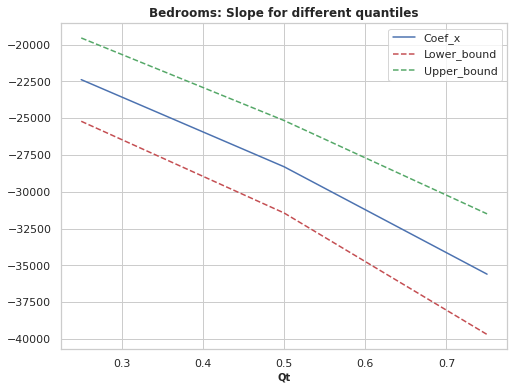

In [48]:
# plotting the quantiles for the bedrooms variable.  
plot_lines(bedrooms, 'Bedrooms')

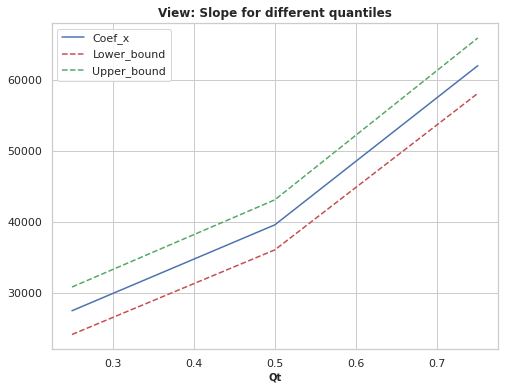

In [49]:
# plotting the quantiles for the view variable.
plot_lines(view, 'View')

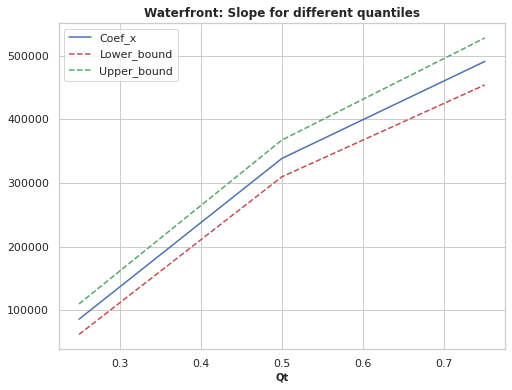

In [50]:
# plotting the quantiles for the waterfront variable
plot_lines(waterfront, 'Waterfront')

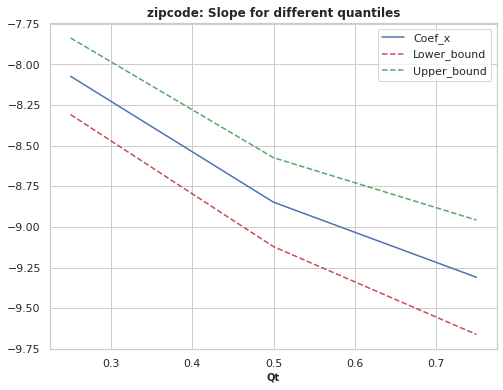

In [51]:
# plotting the quantiles for the zipcode variable
plot_lines(zipcode, 'zipcode')

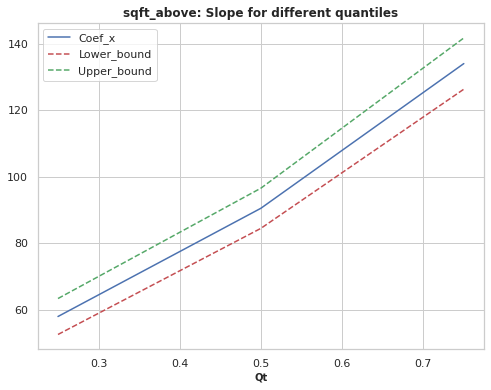

In [52]:
# plotting the quantiles for the sqft_above variable
plot_lines(sqft_above, 'sqft_above')

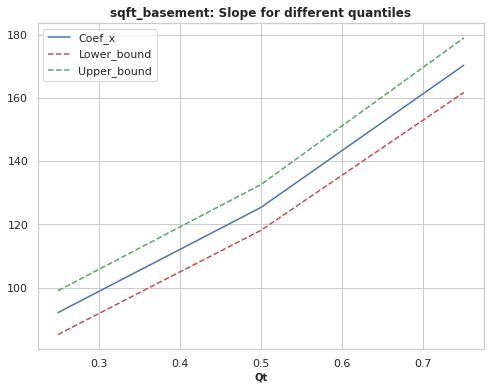

In [53]:
# plotting the quantiles for the sqft_basement variable
plot_lines(sqft_basement, 'sqft_basement')

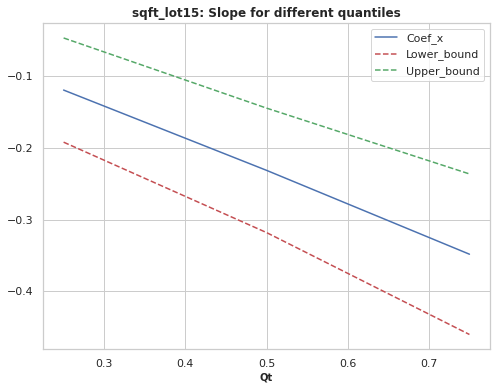

In [54]:
# plotting the quantiles for the sqft_lot variable
plot_lines(sqft_lot15, 'sqft_lot15')

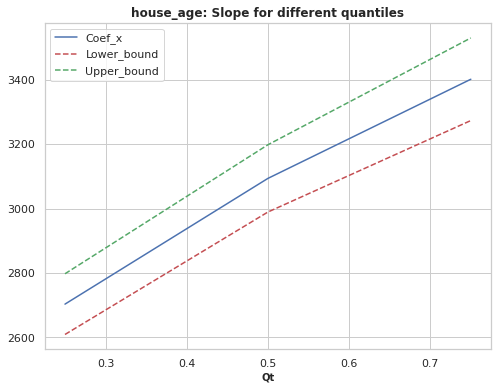

In [55]:
# plotting the quantiles for the house_age variable
plot_lines(house_age,'house_age')

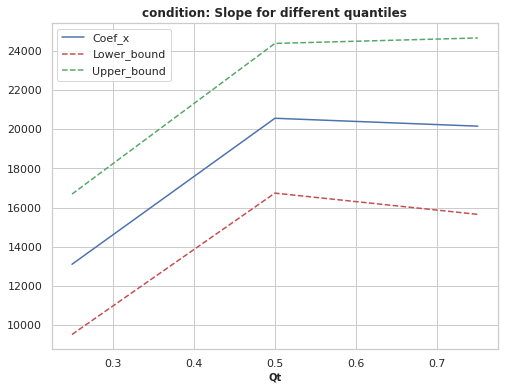

In [56]:
# plotting the quantiles for the condition variable
plot_lines(condition, 'condition')

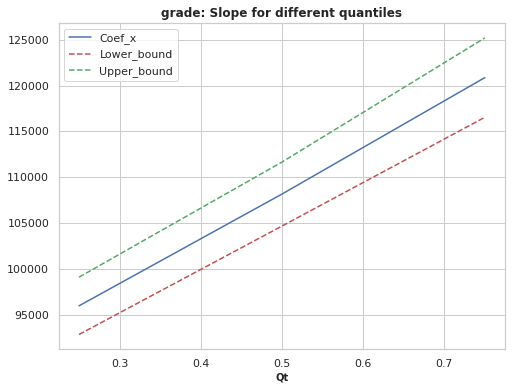

In [57]:
# plotting the quantiles for the grade variable
plot_lines(grade, 'grade')

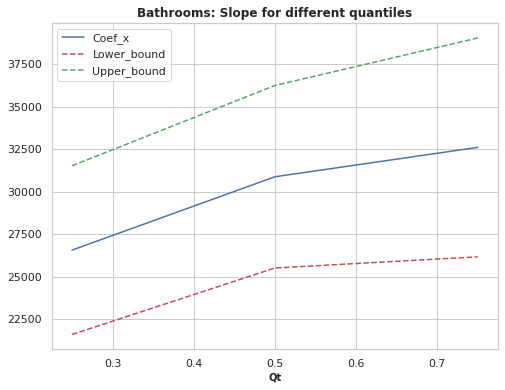

In [58]:
# plotting the quantiles for the bathrooms variable
plot_lines(bathrooms, 'Bathrooms')

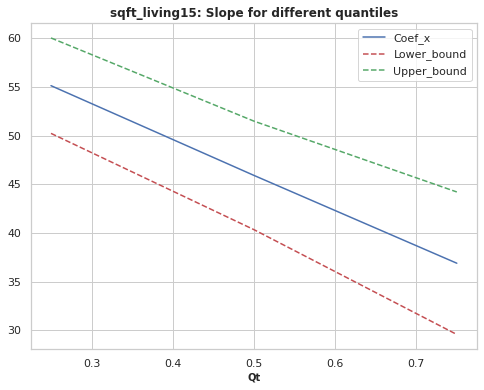

In [59]:
# plotting the quantiles for the sqft_living15 variable
plot_lines(sqft_living15, 'sqft_living15')

## Challenging the Solution

#### Elastic Net Regression

As Elastic regression works well with data that exhibits multicollinearity, it will have no issues handling all the variables at once.

In [60]:
A = dep_var # ------the price variable
B = linear_var

In [61]:
# building the linear regression model for comparison with the elstic net model
line = LinearRegression()

# fitting the model
line.fit(B,A)
a_pred =line.predict(B)

# computing the root mean squared error
RSME =np.sqrt(mean_squared_error(A, a_pred))
RSME

216188.05277337274

In [62]:
# using gridsearch to determine the best values for our parameters for alpha nad l1_ratio

elastic_reg= ElasticNet(normalize=True)
search= GridSearchCV(estimator=elastic_reg,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

# fitting our model
search.fit(B,A)

# displaying the output for the best parameters
print(search.best_params_)

{'alpha': 1e-05, 'l1_ratio': 0.8}


In [63]:
# using the suggested parameters to build our model
elas= ElasticNet(normalize=True,alpha=1e-05,l1_ratio=0.8)

# fitting our model
elas.fit(B,A)

# computing the root mean squared error
mse=(np.sqrt(mean_squared_error(y_true=A,y_pred=elas.predict(B))))
print("Root mean squared error", mse)

Root mean squared error 216602.0579395828


The RMSE for the elastic net is worse than that of the linear model.

In [64]:
# displaying the coefficients for the linear regression

coef_dict_linear = {}
for coef, col in zip(line.coef_,B.columns):
    coef_dict_linear[col] = coef
coef_dict_linear

{'bathrooms': 46895.20344842454,
 'bedrooms': -39505.66346265363,
 'condition': 18364.40071088529,
 'floors': 27580.300798645705,
 'grade': 120006.06836508746,
 'house_age': 3639.8165422132315,
 'sqft_above': 160.89557372084164,
 'sqft_basement': 167.26456394611068,
 'sqft_living15': 24.27739087375994,
 'sqft_lot15': -0.5512216411007103,
 'view': 43633.1206065448,
 'waterfront': 581453.9699551938,
 'zipcode': -11.51895567820884}

In [67]:
# displaying the elestic net model coefficients

coef_dict_elasnet = {}
for coef, col in zip(elas.coef_,B.columns):
    coef_dict_elasnet[col] = coef
coef_dict_elasnet

{'bathrooms': 50002.663394204916,
 'bedrooms': -31908.70731081299,
 'condition': 20395.915313416772,
 'floors': 28295.153085867132,
 'grade': 112490.12044611768,
 'house_age': 3328.5432795518836,
 'sqft_above': 142.48876539662524,
 'sqft_basement': 152.19389177732177,
 'sqft_living15': 39.64618540978389,
 'sqft_lot15': -0.47736728655146154,
 'view': 45907.35241745781,
 'waterfront': 565287.689974064,
 'zipcode': 38.63210387168828}

Waterfront, grade and bathrooms are the most influential variables(in that order) and sqft_lot15 the least.

In [68]:
comparison_frame_elas = pd.DataFrame({'Actual': A, 'Predicted_ElasticNet': elas.predict(B)})

comp_elas =pd.DataFrame(comparison_frame_elas.describe())

In [69]:
comp_elas

,Actual,Predicted_ElasticNet
count,2.161000e+04,2.161000e+04
mean,5.401789e+05,5.401789e+05
std,3.673876e+05,2.889449e+05
min,7.500000e+04,-5.376231e+05
25%,3.216125e+05,3.441622e+05
50%,4.500000e+05,4.810711e+05
75%,6.450000e+05,6.700628e+05
max,7.700000e+06,3.249734e+06


### Lasso Regression

In [81]:
lasso = Lasso(normalize=True) 

# Fitting the Lasso regression model

lasso.fit(linear_var, dep_var) 

# Print scores, MSE, and coefficients
# 
print("lasso score:", lasso.score(linear_var, dep_var)) 
print("lasso RMSE:", np.sqrt(mean_squared_error(y, lasso.predict(linear_var))))

lasso score: 0.6537114794879417
lasso RMSE: 216188.94146386365


In [82]:
# displaying the x coefficient for the different variables
coef_dict_lasso = {}
for coef, col in zip(lasso.coef_,linear_var.columns):
    coef_dict_lasso[col] = coef
coef_dict_lasso

{'bathrooms': 46698.70063747307,
 'bedrooms': -38991.18097641008,
 'condition': 18216.478472899526,
 'floors': 27060.115059877524,
 'grade': 120034.6581890259,
 'house_age': 3625.5236263530405,
 'sqft_above': 160.50739889438015,
 'sqft_basement': 166.6152305048586,
 'sqft_living15': 24.284114118529914,
 'sqft_lot15': -0.5430722776163033,
 'view': 43627.533246205276,
 'waterfront': 580460.2848601496,
 'zipcode': -5.906120046641189}

Waterfront, grade and bathrooms are the most influential variables(in that order) and sqft_lot15 the least.

In [83]:
# creating a dataframe with the actual and predicted values
comparison_frame_lasso = pd.DataFrame({'Actual': dep_var, 'Predicted_Lasso': lasso.predict(linear_var)})

comp_lasso =pd.DataFrame(comparison_frame_lasso.describe())

In [84]:
comp_lasso

,Actual,Predicted_Lasso
count,2.161000e+04,2.161000e+04
mean,5.401789e+05,5.401789e+05
std,3.673876e+05,2.967093e+05
min,7.500000e+04,-7.066970e+05
25%,3.216125e+05,3.385154e+05
50%,4.500000e+05,4.799375e+05
75%,6.450000e+05,6.728619e+05
max,7.700000e+06,3.398506e+06


### Ridge regression

In [85]:
# building a Ridge regression model
ridge = Ridge(normalize=True)

# using grid search to determine the best parameters for our model.
grid = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

# fitting the model
grid.fit(linear_var,dep_var)

# displaying the best parameters
print(grid.best_params_)


{'alpha': 0.01}


In [86]:
# inserting the reccomended alpha value
ridge_reg = Ridge(normalize=True,alpha=0.01)

# fitting the model
ridge_reg.fit(linear_var,dep_var)

# computing the root mean squared error
ridge_mse = (mean_squared_error(y_true=y,y_pred=ridge_reg.predict(X)))
print(np.sqrt(ridge_mse))

216215.49324876026


In [87]:
# displaying the output for the regression score

ridge_reg.score(linear_var, dep_var)

0.6536264136850927

In [88]:
# displaying the x coefficient for the different variables

coef_dict_ridge = {}
for coef, col in zip(ridge_reg.coef_,linear_var.columns):
    coef_dict_ridge[col] = coef
coef_dict_ridge

{'bathrooms': 47867.662870789914,
 'bedrooms': -37542.989799678595,
 'condition': 18906.563442790135,
 'floors': 27804.220443846032,
 'grade': 118169.85875238021,
 'house_age': 3563.9800720554895,
 'sqft_above': 155.8398926805522,
 'sqft_basement': 163.1562338553095,
 'sqft_living15': 28.527078639139333,
 'sqft_lot15': -0.5320966275619109,
 'view': 44204.56774976077,
 'waterfront': 577702.4258979106,
 'zipcode': 1.846365600614242}

Waterfront, grade and bathrooms are the most influential variables and sqft_lot15 and zipcode the least, sqft_lot15 being the least influential.

In [89]:
# creating a dataframe with the actual and predicted values
comparison_frame_ridge = pd.DataFrame({'Actual': dep_var, 'Predicted_Ridge': ridge_reg.predict(linear_var)})

comp_ridge =pd.DataFrame(comparison_frame_ridge.describe())

In [90]:
comp_ridge

,Actual,Predicted_Ridge
count,2.161000e+04,2.161000e+04
mean,5.401789e+05,5.401789e+05
std,3.673876e+05,2.950186e+05
min,7.500000e+04,-6.640365e+05
25%,3.216125e+05,3.396384e+05
50%,4.500000e+05,4.800893e+05
75%,6.450000e+05,6.719632e+05
max,7.700000e+06,3.363997e+06


### Comparing summaries for the different regression models

In [91]:
# comparing the summaries for the different regressions, ie. Linear, ElasticNet, Lasso and Ridge

# concatenating the for dataset

Summaries = pd.concat([comp_elas, comp_line['Predicted_linear'], comp_lasso['Predicted_Lasso'], comp_ridge['Predicted_Ridge']], axis=1)
Summaries

,Actual,Predicted_ElasticNet,Predicted_linear,Predicted_Lasso,Predicted_Ridge
count,2.161000e+04,2.161000e+04,4.322000e+03,2.161000e+04,2.161000e+04
mean,5.401789e+05,5.401789e+05,5.383055e+05,5.401789e+05,5.401789e+05
std,3.673876e+05,2.889449e+05,2.919987e+05,2.967093e+05,2.950186e+05
min,7.500000e+04,-5.376231e+05,-5.679715e+05,-7.066970e+05,-6.640365e+05
25%,3.216125e+05,3.441622e+05,3.436053e+05,3.385154e+05,3.396384e+05
50%,4.500000e+05,4.810711e+05,4.793629e+05,4.799375e+05,4.800893e+05
75%,6.450000e+05,6.700628e+05,6.660767e+05,6.728619e+05,6.719632e+05
max,7.700000e+06,3.249734e+06,3.335698e+06,3.398506e+06,3.363997e+06


- The linear regression value for mean is the furthest removed from the actual mean.
- The standard deviation closest to the actual value is the std for the Lasso regression predicted values.
- The minimum value is far removed for all the predicted values for the different regressions.
- The maximum value is also far removed for all the predicted values for the different regressions. However, the values revolve around the same range, around 3.2e+05, 3.3e+05.
- The values for the quantiles don't deviate very far from the actual values.
